In [21]:
## FIRST TIME PLAYING WITH DATA ##

import os
import numpy as np
import pandas as pd
from pandas import read_csv
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

data = pd.read_csv("student-mat.csv", sep=";")

data = data[["G1", "G2", "G3", "studytime", "traveltime", "failures"]]

predict = "G3"

X = np.array(data.drop([predict], 1)) # drop data for a column
y = np.array(data[predict]) # predicts for the previously droped data

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

linear = linear_model.LinearRegression()

linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test) #accuracy
print(acc)

print("coefficient: \n", linear.coef_)
print("intercept: \n", linear.intercept_)
print('\n')

predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])
    


0.8716973722382385
coefficient: 
 [ 0.12911608  0.99388592 -0.19366235  0.10177306 -0.31621987]
intercept: 
 -1.314713130877374




0.8823277328316296
0.715088567766774
0.8649962179605685
0.8896184432239178
0.8624387048389033
0.7875106783613479
0.8913430657232367
0.8673011835659039
0.7933481459355647
0.82102559910995
0.7991849175841156
0.7669668164097512
0.9423078694396817
0.8847105247215743
0.7447010701046344
0.725226788813171
0.7188997095964136
0.8121282278161347
0.7131947245283334
0.8657805487356325
0.8337663210209987
0.7709725992868159
0.8184680140000282
0.8786033683593627
0.8499306905608118
0.8993374760092836
0.8589763156806509
0.8420604432109585
0.8296299832606986
0.8615085942981566
0.7526479763098441
0.7700445542736924
0.7451044138249397
0.7462272950079659
0.8354333872354224
0.8694807237677902
0.8731111470260892
0.7429697806617074
0.8014385656344261
0.8483777691052466
0.8905701232675125
0.7708569791604347
0.8226001845227753
0.7928450884710618
0.8087648844017036
0.8621011925132037
0.8526478564763567
0.8711311072724552
0.7994572223605392
0.8310131083400696
coefficient: 
 [ 0.15088074  0.98867495 -0.19881393  0

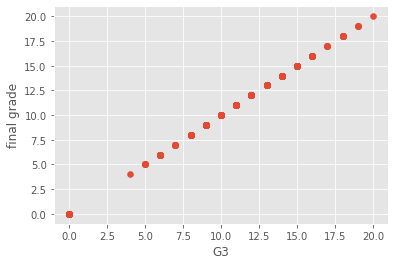

In [2]:
## SAVING MODEL AND PLOTTING DATA ##

import os
import numpy as np
import pandas as pd
from pandas import read_csv
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style 

data = pd.read_csv("student-mat.csv", sep=";")

data = data[["G1", "G2", "G3", "studytime", "traveltime", "failures"]]

predict = "G3"

X = np.array(data.drop([predict], 1)) # drop data for a column
y = np.array(data[predict]) # predicts for the previously droped data
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

best = 0
for _ in range(50):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test) #accuracy
    print(acc)
    
    if acc > best:
        best = acc
        with open ("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)
            # using Pickle to save dataset

pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

# predictions
print("coefficient: \n", linear.coef_)
print("intercept: \n", linear.intercept_)
print('\n')
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])
    
# PLOT

p1 = 'G3'
style.use("ggplot")
pyplot.scatter(data[p1], data["G3"])
pyplot.xlabel(p1)
pyplot.ylabel("final grade")
        pyplot.show()